# South African Language Classifier


South Africa is a very diverse country that is rich in culture. Language serves as an essential tool to strengthen democracy and enrich the social, cultural, intellectual, economic, and political life of the nation. Given the multilingual nature of its population, it is evident that our systems and devices should also be equipped to communicate in multiple languages. It can be difficult navigating this country even as a citizen because it has 11 offical languages. The task is to create a model that will classify text to it's appropriate language.

# Table of Contents

1. Importing Packages
2. Loading Data
3. Exploratory Data Analysis
4. Modeling
5. Conclusion

## 1. Importing Packages

In [3]:
# importing pandas to interact with dataframes
import pandas as pd

# Importing packages to engage in natural langage proccessing
import nltk

# Package that allows us to tokenize our textual data
from nltk.tokenize import word_tokenize

# Importing a package that will give us access to stop words
from nltk.corpus import stopwords

# Import a package that will let us stemmatize words
from nltk.stem import SnowballStemmer


# import a package which will display words in a word cloud
from wordcloud import WordCloud

# Package which will assist with visualizing our data
import matplotlib.pyplot as plt

#commands which will download 'punkt' and 'stopwords' respectively should they not be installed on your computer
nltk.download('punkt')
nltk.download('stopwords')

# Array of Scikitlearn modules used for training our models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# time package will allow us to get the training time on our models
import time

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nolwazidube/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/nolwazidube/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!



## 2. Loading the Data

In [5]:
# Load the datasets
df_train = pd.read_csv('train_set.csv')
df_test = pd.read_csv('test_set.csv')


## 3. Exploratory Data Analysis (EDA)


In [6]:
df_train.head()

,lang_id,text
0,xho,umgaqo-siseko wenza amalungiselelo kumaziko ax...
1,xho,i-dha iya kuba nobulumko bokubeka umsebenzi na...
2,eng,the province of kwazulu-natal department of tr...
3,nso,o netefatša gore o ba file dilo ka moka tše le...
4,ven,khomishini ya ndinganyiso ya mbeu yo ewa maana...


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33000 entries, 0 to 32999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   lang_id  33000 non-null  object
 1   text     33000 non-null  object
dtypes: object(2)
memory usage: 515.8+ KB


There are two columns namely `lang_id` and `text`. `lang_id` contains labels that the respective language the text belongs to hence it is our target variable. `text` containts the text in that particular language. There are 33000 rows and no missing values.

Let us make sure we have the correct number of languages. We expect 11.

In [11]:
#Number of unique languages
len(df_train['lang_id'].unique())

11

Let's find out how many data samples or observations are associated to each South African language.

In [12]:
df_train['lang_id'].value_counts()

lang_id
xho    3000
eng    3000
nso    3000
ven    3000
tsn    3000
nbl    3000
zul    3000
ssw    3000
tso    3000
sot    3000
afr    3000
Name: count, dtype: int64

There are 3000 in each, well balanced dataset. Hence no need to balance out the dataset. 

Let's look at the distribution of this data to ensure the data is indeed balanced.

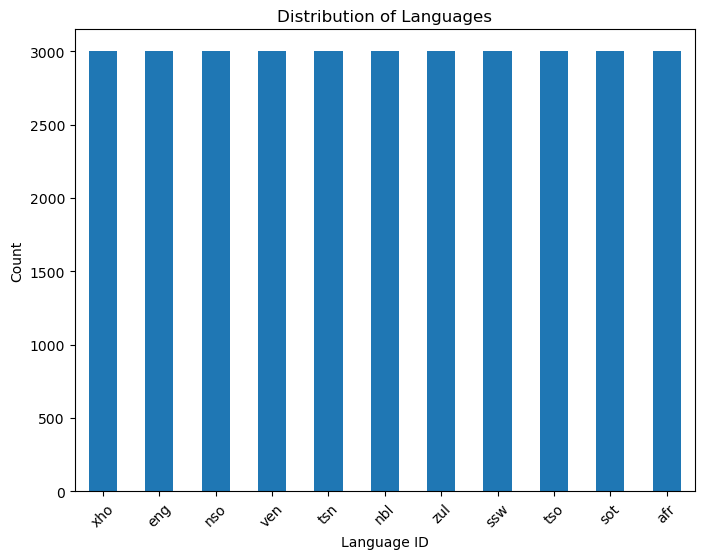

In [16]:
# Visualize distribution of languages
language_counts = df_train['lang_id'].value_counts()

plt.figure(figsize=(8, 6))
language_counts.plot(kind='bar')
plt.title('Distribution of Languages')
plt.xlabel('Language ID')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

Let us assess the test dataset.

In [13]:
df_test.head()

,index,text
0,1,"Mmasepala, fa maemo a a kgethegileng a letlele..."
1,2,Uzakwaziswa ngokufaneleko nakungafuneka eminye...
2,3,Tshivhumbeo tshi fana na ngano dza vhathu.
3,4,Kube inja nelikati betingevakala kutsi titsini...
4,5,Winste op buitelandse valuta.


In [14]:
print(test_data.shape)

(5682, 2)


There are 5682 observations in the test dataset. It is made up of 2 columns namely `index` and `text`. `index` represents the n'th number of observation. `text` are the texts that need to be classified. 

### Word Cloud

Before pre processing our data let's have a look at a wordlcoud of our data. A word cloud is a visual representation of text data where the size of each word indicates its frequency within a given body of text. It is commonly used to summarize large amounts of text data in a visually engaging way, making it easy to identify the most prominent words and themes at a glance.

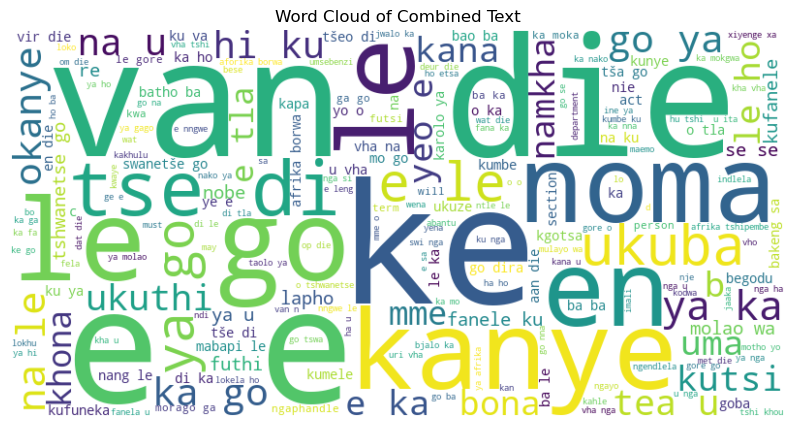

In [15]:
# Combine text from different languages for visualization
combined_text = ' '.join(df_train['text'])

# Create and generate a word cloud image
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(combined_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Combined Text')
plt.show()

From the word cloud, the most frequent words are in Afrikaans followed by ped, tswana and zulu.

## Text cleaning


This is a preprocessing step that involves removing stop words, punctuation, incorrect spellings etc. Stop words are commonly used words such as "the," "is," "in," "and," etc., that generally do not carry significant meaning or contribute to the overall context of the text. Stop words can add noise to the data, which can obscure the important information and reduce the effectiveness of text analysis. Before we remove the noise, let us tokenize the data. Tokenization is the process of breaking down a text into smaller units called tokens. It is crucial for preparing text data for further analysis, such as parsing, stemming, or constructing a vector space model.

In [19]:
# Preprocessing function
def preprocess_text(text):
    # Tokenize text
    tokens = word_tokenize(text)
    
    # Remove stop words
    stop_words = set(stopwords.words('english'))  
    tokens = [word for word in tokens if word.lower() not in stop_words]
    
    # Stemming
    stemmer = SnowballStemmer('english')  
    stemmed = [stemmer.stem(word) for word in tokens]
    
    return ' '.join(stemmed)

# Apply preprocessing to the text data
df_train['clean_text'] = df_train['text'].apply(preprocess_text)
df_test['clean_text'] = df_test['text'].apply(preprocess_text)


## Vectorization

Vectorization is the process of converting text data into numerical vectors so that it can be used as input for machine learning algorithms. Since most machine learning models require numerical input. We will use the `TF-IDF` vectorizer. `Tf-IDF` (Term Frequency - Inverse Document Frequency) counts up the occurences of a word in a document, as well as the entire collection of our data, and divides it by the total number of words in a document. It attempts to see how important a word in a document as well as its importance within the entire data set. 

In [22]:
# Vectorize the text using TF-IDF
tfidf = TfidfVectorizer()
X = tfidf.fit_transform(df_train['clean_text'])
X_test = tfidf.transform(df_test['clean_text'])

<a id="four"></a>
# 4. Modelling


Before we train our model, let us split our data to 80% train dataset and 20% test dataset.

In [24]:
# split data
# Define target variable
y = df_train['lang_id']

# Split data for training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

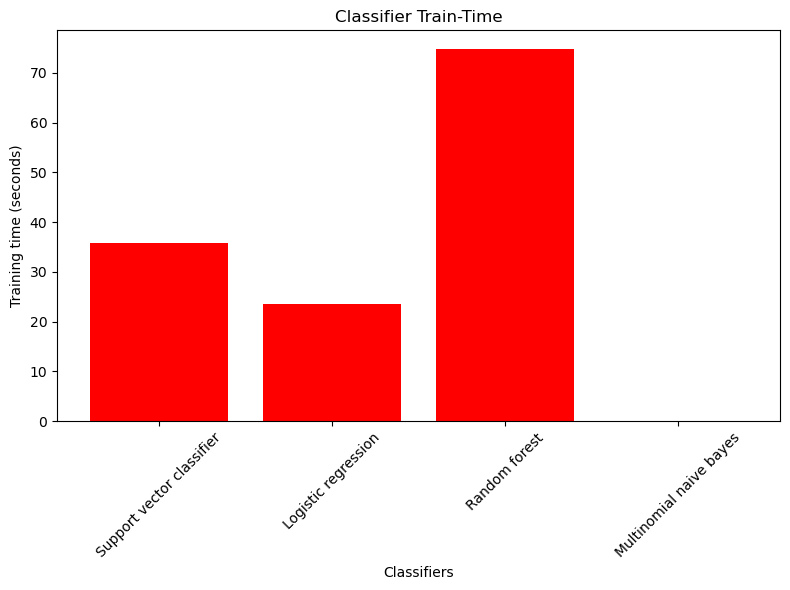

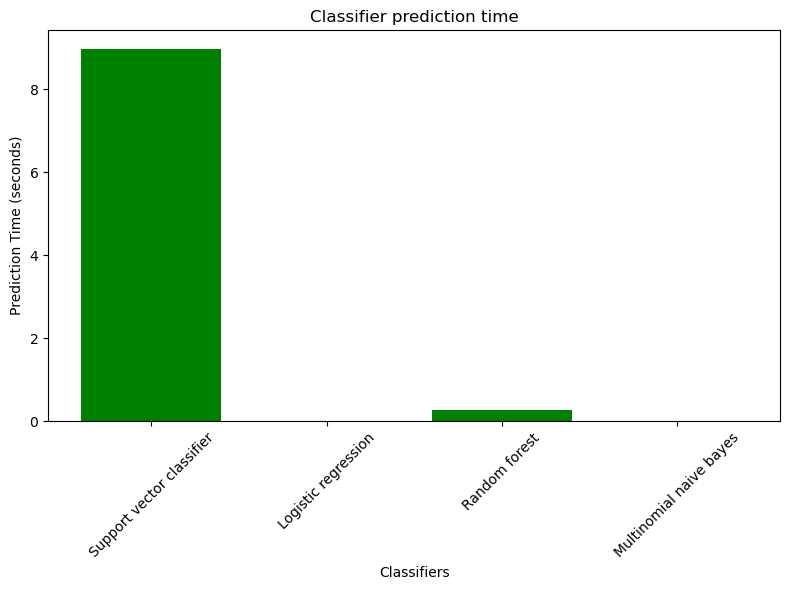

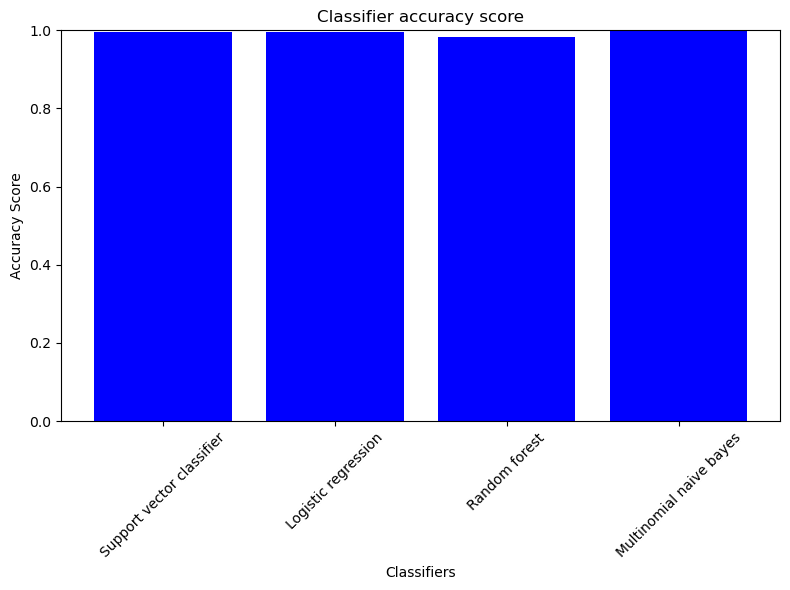

In [35]:
# Initialize different classifiers
classifiers = {
    'Support vector classifier': SVC(kernel='linear'),
    'Logistic regression': LogisticRegression(max_iter=1000),
    'Random forest': RandomForestClassifier(n_estimators=100),
    'Multinomial naive bayes': MultinomialNB(),
}

# Train each classifier, make predictions on the test set, and measure training/prediction times
training_times = {}
prediction_times = {}
accuracy_scores = {}
for clf_name, clf in classifiers.items():
    start_time = time.time()  # Record start time
    clf.fit(X_train, y_train)  # Train the classifier
    end_time = time.time()  # Record end time
    training_time = end_time - start_time  # Calculate training time
    training_times[clf_name] = training_time
    
    start_time = time.time()  # Record start time for prediction
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    end_time = time.time()  # Record end time for prediction
    prediction_time = end_time - start_time  # Calculate prediction time
    prediction_times[clf_name] = prediction_time
    
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy on the test set
    accuracy_scores[clf_name] = accuracy

# Plot training time
plt.figure(figsize=(8, 6))
plt.bar(training_times.keys(), training_times.values(), color='red')
plt.xlabel('Classifiers')
plt.ylabel('Training time (seconds)')
plt.title('Classifier Train-Time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot prediction time
plt.figure(figsize=(8, 6))
plt.bar(prediction_times.keys(), prediction_times.values(), color='green')
plt.xlabel('Classifiers')
plt.ylabel('Prediction Time (seconds)')
plt.title('Classifier prediction time')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Plot accuracy score
plt.figure(figsize=(8, 6))
plt.bar(accuracy_scores.keys(), accuracy_scores.values(), color='blue')
plt.xlabel('Classifiers')
plt.ylabel('Accuracy Score')
plt.title('Classifier accuracy score')
plt.xticks(rotation=45)
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

We observe the following:
- The `Random forest` model has the highest train-time and `Mulitnomial Naive Bayes` had the least.
- `Mulitnomial Naive Bayes` has the least prediction time and `Support vector classifier` had the most prediction time.
- For the performance metric we use accuracy because our dataset is balanced. `Mulitnomial Naive Bayes` has the highest accuracy which makes it the best perfoming, not just because it had the highest accuracy but it also had the least run-time for train the data and prediction.

# 5. Conclusion

The key objective was to build a model that would predict South African Languages. After training four machine learning models (Support Vector Classifier, Random forest, Multinomial naive bayes), the best performing model was `Multinomial naive bayes` due to it high accuracy score and low run-time for training and prediction. Run-time metric is important because we we are to deploy an app, the time it takes for a user to get a response is important. Such a model would greatly add to tourism in South Africa for people visiting and want to learn a particular South Africa language. It can also be beficial to residents in the country navigating from one space to another.